In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# bai tap 1
df = pd.read_csv('data/cleveland.csv', header = None )
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [3]:
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 
              'fbs', 'restecg', 'thalach', 'exang', 
              'oldpeak', 'slope', 'ca', 'thal', 'target']

df['target'] = df['target'].map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})
df['thal'] = df['thal'].fillna(df['thal'].mean())
df['ca'] = df['ca'].fillna(df['ca'].mean())


In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


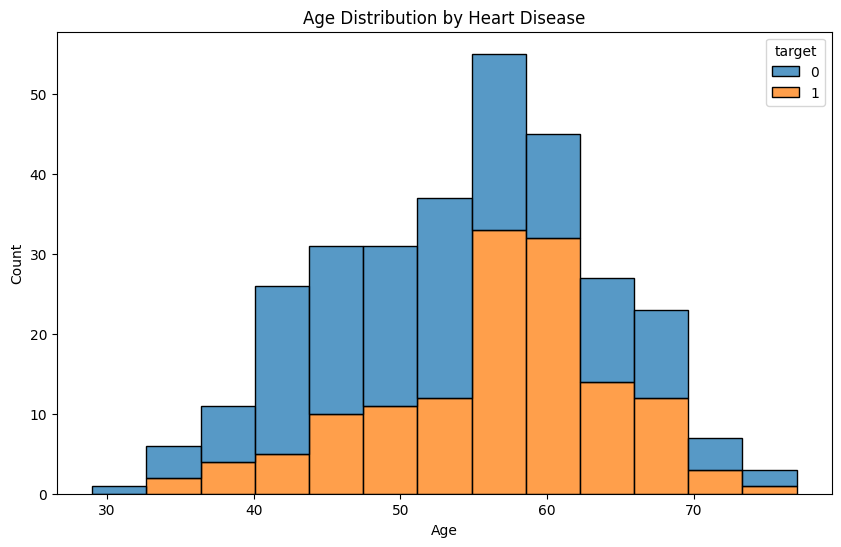

In [5]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue='target', multiple='stack')
plt.title('Age Distribution by Heart Disease')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

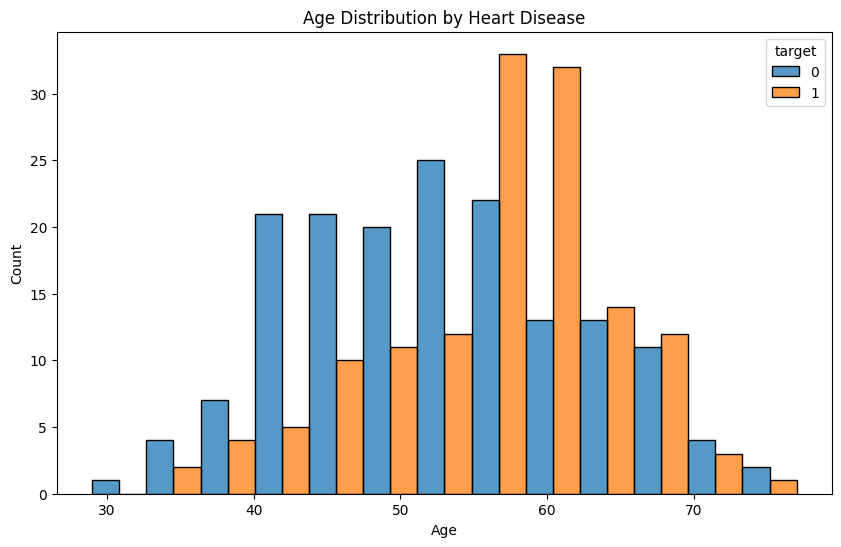

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue='target', multiple='dodge', kde=False)
plt.title('Age Distribution by Heart Disease')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

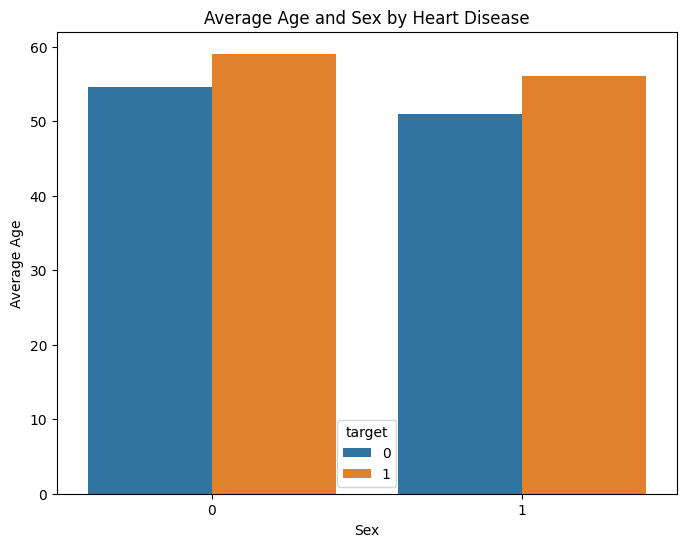

In [7]:
plt.figure(figsize=(8, 6))
sns.barplot(x='sex', y='age', hue='target', data=df, errorbar=None)
plt.title('Average Age and Sex by Heart Disease')
plt.xlabel('Sex')
plt.ylabel('Average Age')
plt.show()

In [8]:
from sklearn.model_selection import train_test_split

# Lấy các giá trị X và y từ DataFrame
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Chia dữ liệu thành tập train và test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=5,
weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski')
KNN.fit(X_train,y_train)

y_predict = KNN.predict(X_test)



In [11]:
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_predict, y_test)

y_predict_train = KNN.predict(X_train)
cm_train = confusion_matrix(y_predict_train, y_train)

In [12]:
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

print('Accuracy for training set for KNeighborsClassifier = {}'.format(accuracy_for_train))
print('Accuracy for test set for KNeighborsClassifier = {}'.format(accuracy_for_test))


Accuracy for training set for KNeighborsClassifier = 0.76
Accuracy for test set for KNeighborsClassifier = 0.69


In [21]:
# Bài tập 4: SVM
from sklearn import svm
SVM = svm.SVC(kernel = 'rbf', random_state=42)
SVM.fit(X_train,y_train)

y_predict = SVM.predict(X_test)
cm_test = confusion_matrix(y_predict, y_test)

y_predict_train = SVM.predict(X_train)
cm_train = confusion_matrix(y_predict_train, y_train)

In [22]:
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

print('Accuracy for training set for SVM = {}'.format(accuracy_for_train))
print('Accuracy for test set for SVM = {}'.format(accuracy_for_test))

Accuracy for training set for SVM = 0.66
Accuracy for test set for SVM = 0.67


In [26]:
# Bài tập 5: Naive Bayes
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()
NB.fit(X_train, y_train)

y_predict = NB.predict(X_test)
cm_test = confusion_matrix(y_predict, y_test)

y_predict_train = NB.predict(X_train)
cm_train = confusion_matrix(y_predict_train, y_train)

In [27]:
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

print('Accuracy for training set for Naives Bayes = {}'.format(accuracy_for_train))
print('Accuracy for test set for Naives Bayes = {}'.format(accuracy_for_test))

Accuracy for training set for Naives Bayes = 0.85
Accuracy for test set for Naives Bayes = 0.84


In [28]:
# Bài tập 6: Decision Tree
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_split=2)
DT.fit(X_train, y_train)

y_predict = DT.predict(X_test)
cm_test = confusion_matrix(y_predict, y_test)

y_predict_train = DT.predict(X_train)
cm_train = confusion_matrix(y_predict_train, y_train)

In [29]:
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

print('Accuracy for training set for Decision Tree= {}'.format(accuracy_for_train))
print('Accuracy for test set for Decision Tree = {}'.format(accuracy_for_test))

Accuracy for training set for Decision Tree= 1.0
Accuracy for test set for Decision Tree = 0.75


In [30]:
# Bài tập 7: Random Forest
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(criterion='gini', max_depth=10, min_samples_split=2, n_estimators=10, random_state=42)
RF.fit(X_train, y_train)

y_predict = RF.predict(X_test)
cm_test = confusion_matrix(y_predict, y_test)

y_predict_train = RF.predict(X_train)
cm_train = confusion_matrix(y_predict_train, y_train)

In [31]:
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

print('Accuracy for training set for Random Tree= {}'.format(accuracy_for_train))
print('Accuracy for test set for Random Tree = {}'.format(accuracy_for_test))

Accuracy for training set for Random Tree= 0.98
Accuracy for test set for Random Tree = 0.8


In [32]:
# bài tập 8: Adaboost
from sklearn.ensemble import AdaBoostClassifier

Ada = AdaBoostClassifier(n_estimators=50, learning_rate=1.0)
Ada.fit(X_train, y_train)

y_predict = Ada.predict(X_test)
cm_test = confusion_matrix(y_predict, y_test)

y_predict_train = Ada.predict(X_train)
cm_train = confusion_matrix(y_predict_train, y_train)

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

print('Accuracy for training set for Adaboost = {}'.format(accuracy_for_train))
print('Accuracy for test set for Adaboost = {}'.format(accuracy_for_test))

Accuracy for training set for Adaboost = 0.91
Accuracy for test set for Adaboost = 0.84


/media/tan/F/AIO_project/Heart_desease_prediction/env/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [33]:
# bài tập 9: GradientBoost
from sklearn.ensemble import GradientBoostingClassifier

GB = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, subsample=1.0, min_samples_split=2, max_depth=3,
random_state=42)
GB.fit(X_train, y_train)

y_predict = GB.predict(X_test)
cm_test = confusion_matrix(y_predict, y_test)

y_predict_train = GB.predict(X_train)
cm_train = confusion_matrix(y_predict_train, y_train)

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

print('Accuracy for training set for GradientBoost = {}'.format(accuracy_for_train))
print('Accuracy for test set for GradientBoost = {}'.format(accuracy_for_test))

Accuracy for training set for GradientBoost = 1.0
Accuracy for test set for GradientBoost = 0.85


In [36]:
# bài tập 10: XGBoost
from xgboost import XGBClassifier

XGB = XGBClassifier(objective="binary:logistic", random_state=42, n_estimators = 100)
XGB.fit(X_train, y_train)

y_predict = XGB.predict(X_test)
cm_test = confusion_matrix(y_predict, y_test)

y_predict_train = XGB.predict(X_train)
cm_train = confusion_matrix(y_predict_train, y_train)

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

print('Accuracy for training set for XGBoost = {}'.format(accuracy_for_train))
print('Accuracy for test set for XGBoost = {}'.format(accuracy_for_test))

Accuracy for training set for XGBoost = 1.0
Accuracy for test set for XGBoost = 0.87


In [37]:
# Bài tạp 11: Stacking
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Khởi tạo các mô hình với random_state để đảm bảo tái lập kết quả
dtc = DecisionTreeClassifier(random_state=42)
rfc = RandomForestClassifier(random_state=42)
knn = KNeighborsClassifier()
xgb = XGBClassifier()  # Đã sửa lại cú pháp đúng
gc = GradientBoostingClassifier(random_state=42)
svc = SVC(kernel='rbf', random_state=42)
ad = AdaBoostClassifier(random_state=42)

from sklearn.ensemble import StackingClassifier

clf = [('dtc', dtc),('rfc', rfc),('knn', knn),('gc', gc),('ad', ad),('svc', svc)]
Stacking = StackingClassifier( estimators = clf, final_estimator=xgb)


Stacking.fit(X_train, y_train)

y_predict = Stacking.predict(X_test)
cm_test = confusion_matrix(y_predict, y_test)

y_predict_train = Stacking.predict(X_train)
cm_train = confusion_matrix(y_predict_train, y_train)

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

print('Accuracy for training set for Stacking = {}'.format(accuracy_for_train))
print('Accuracy for test set for Stacking = {}'.format(accuracy_for_test))

/media/tan/F/AIO_project/Heart_desease_prediction/env/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/media/tan/F/AIO_project/Heart_desease_prediction/env/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/media/tan/F/AIO_project/Heart_desease_prediction/env/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/media/tan/F/AIO_project/Heart_desease_prediction/env/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

Accuracy for training set for Stacking = 0.92
Accuracy for test set for Stacking = 0.9
